## Gene Disease Association

Select the dataset here

In [1]:
from utils.datasets import BrainCancer, BreastCancer, LiverCancer, ProstateCancer

dataset = ProstateCancer()

Dataset details

In [2]:
from sklearn.model_selection import train_test_split

from utils.classifiers import classify

print('-' * 20, dataset.name, '-' * 20)
samples, sample_labels = dataset.get_samples_and_labels()

print('Total Samples:', samples.shape[0])
print('Total Features:', samples.shape[1])

pos_samples = sample_labels.count(1)
print('Positive Samples:', pos_samples)
print('Negative Samples:', samples.shape[0]-pos_samples)

print('Splitting dataset into 70% training and 30% test..')
X_train, X_test, y_train, y_test = train_test_split(samples, sample_labels, test_size=0.3, random_state=109)

results = []

-------------------- Prostate Cancer --------------------
Total Samples: 102
Total Features: 339
Positive Samples: 52
Negative Samples: 50
Splitting dataset into 70% training and 30% test..


1. No feature selection

In [3]:
%%time
classify(X_train, X_test, y_train, y_test, results=results)

╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.709677 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.774194 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.709677 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.806452 │
╘══════════════════════════════╧══════════╛
CPU times: user 726 ms, sys: 844 ms, total: 1.57 s
Wall time: 248 ms


2. Binary BAT Algorithm (BBA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.7529203539823008
Number of Features: 121
----------------------------------------

Bat 1 - Fitness: 0.7529203539823008, Number of Features: 121
Bat 2 - Fitness: 0.746401179941003, Number of Features: 102
Bat 3 - Fitness: 0.7443952802359883, Number of Features: 157
Bat 4 - Fitness: 0.7384365781710914, Number of Features: 111
Bat 5 - Fitness: 0.7304719764011799, Number of Features: 120
Bat 6 - Fitness: 0.7263716814159291, Number of Features: 151
Bat 7 - Fitness: 0.723952802359882, Number of Features: 101
Bat 8 - Fitness: 0.7221828908554573, Number of Features: 103
Bat 9 - Fitness: 0.7204129793510324, Number of Features: 105
Bat 10 - Fitness: 0.7186430678466077, Number of Features: 107
Bat 11 - Fitness: 0.7168731563421828, Number of Features: 109
Bat 12 - Fitness: 0.7151032448377581, Number of Features: 111
Bat 13 - Fitness: 0.7151032448377581, Number of Features: 111
Bat 

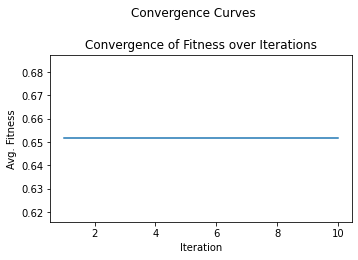

=> Features Selected: 121
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.774194 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.677419 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.903226 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.741935 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.419355 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.741935 │
╘══════════════════════════════╧══════════╛
CPU times: user 37.2 s, sys: 23.4 s, total: 1min
Wall time: 9.21 s


In [6]:
%%time
from Py_FS.wrapper.nature_inspired import BBA

sol = BBA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Binary BAT Algorithm')

3. Mayfly Algorithm (MA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.7160766961651919
Number of Features: 189
----------------------------------------

Mayfly 1 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 2 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 3 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 4 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 5 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 6 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 7 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 8 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 9 - Fitness: 0.7160766961651919, Number of Features: 189
Mayfly 10 - Fitness: 0.6930678466076696, Number of Features: 215
Mayfly 11 - Fitness: 0.6930678466076696, Number of Features: 215
Mayfly 12 - Fitness: 0.6930678466076696, Number of Features: 215
Mayfly 13 - Fitness: 0.69306

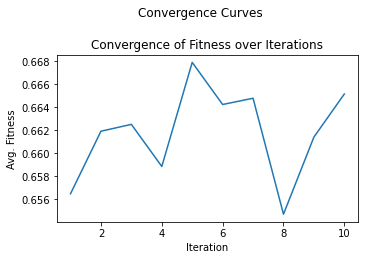

=> Features Selected: 256
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.903226 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.709677 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.870968 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.83871  │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.741935 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.774194 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.806452 │
╘══════════════════════════════╧══════════╛
CPU times: user 3min 35s, sys: 48.6 s, total: 4min 23s
Wall time: 36.2 s


In [7]:
%%time
from Py_FS.wrapper.nature_inspired import MA

sol = MA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Mafly Algorithm')

4. Particle Swarm Optimization (PSO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.8238053097345133
Number of Features: 120
----------------------------------------

Particle 1 - Fitness: 0.8238053097345133, Number of Features: 120
Particle 2 - Fitness: 0.8193805309734514, Number of Features: 125
Particle 3 - Fitness: 0.8075516224188791, Number of Features: 112
Particle 4 - Fitness: 0.8069911504424779, Number of Features: 139
Particle 5 - Fitness: 0.8061061946902655, Number of Features: 140
Particle 6 - Fitness: 0.7999115044247788, Number of Features: 147
Particle 7 - Fitness: 0.7969321533923304, Number of Features: 124
Particle 8 - Fitness: 0.7954867256637168, Number of Features: 152
Particle 9 - Fitness: 0.791061946902655, Number of Features: 157
Particle 10 - Fitness: 0.7907374631268437, Number of Features: 131
Particle 11 - Fitness: 0.7907374631268437, Number of Features: 131
Particle 12 - Fitness: 0.7898525073746313, Number of Features: 132
Parti

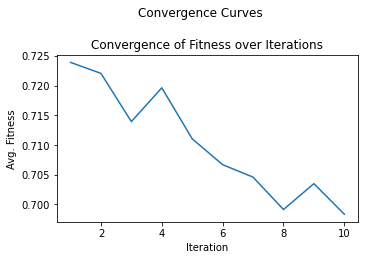

=> Features Selected: 150
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.903226 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.580645 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.83871  │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.903226 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.741935 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.741935 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.483871 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.774194 │
╘══════════════════════════════╧══════════╛
CPU times: user 26.2 s, sys: 22.9 s, total: 49 s
Wall time: 7.76 s


In [8]:
%%time
from Py_FS.wrapper.nature_inspired import PSO

sol = PSO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Particle Swarm Optimization')

5. Grey Wolf Optimizer (GWO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.6596755162241887
Number of Features: 200
----------------------------------------

Greywolf 1 - Fitness: 0.6596755162241887, Number of Features: 200
Greywolf 2 - Fitness: 0.655811209439528, Number of Features: 178
Greywolf 3 - Fitness: 0.6478466076696165, Number of Features: 187
Greywolf 4 - Fitness: 0.6460766961651918, Number of Features: 189
Greywolf 5 - Fitness: 0.6381120943952803, Number of Features: 198
Greywolf 6 - Fitness: 0.6324778761061947, Number of Features: 178
Greywolf 7 - Fitness: 0.6292625368731564, Number of Features: 208
Greywolf 8 - Fitness: 0.628377581120944, Number of Features: 209
Greywolf 9 - Fitness: 0.6236283185840708, Number of Features: 188
Greywolf 10 - Fitness: 0.621858407079646, Number of Features: 190
Greywolf 11 - Fitness: 0.6209734513274336, Number of Features: 191
Greywolf 12 - Fitness: 0.6192035398230088, Number of Features: 193
Greywol

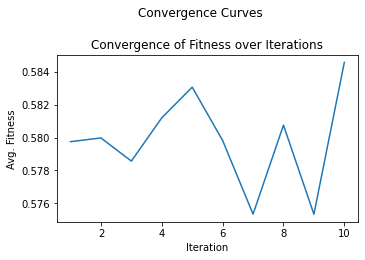

=> Features Selected: 108
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.870968 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.83871  │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.870968 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.83871  │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.741935 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.709677 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.516129 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.83871  │
╘══════════════════════════════╧══════════╛
CPU times: user 30.7 s, sys: 20.8 s, total: 51.5 s
Wall time: 8.24 s


In [9]:
%%time
from Py_FS.wrapper.nature_inspired import GWO

sol = GWO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Grey Wolf Optimiser')

6. Harmony Search (HS)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.7455162241887906
Number of Features: 103
----------------------------------------

Harmony 1 - Fitness: 0.7455162241887906, Number of Features: 103
Harmony 2 - Fitness: 0.7410914454277286, Number of Features: 108
Harmony 3 - Fitness: 0.7260471976401179, Number of Features: 125
Harmony 4 - Fitness: 0.7221828908554573, Number of Features: 103
Harmony 5 - Fitness: 0.7151032448377581, Number of Features: 111
Harmony 6 - Fitness: 0.7133333333333334, Number of Features: 113
Harmony 7 - Fitness: 0.712448377581121, Number of Features: 114
Harmony 8 - Fitness: 0.708023598820059, Number of Features: 119
Harmony 9 - Fitness: 0.7039233038348083, Number of Features: 150
Harmony 10 - Fitness: 0.7035988200589971, Number of Features: 124
Harmony 11 - Fitness: 0.7006194690265486, Number of Features: 101
Harmony 12 - Fitness: 0.7000589970501475, Number of Features: 128
Harmony 13 - Fitne

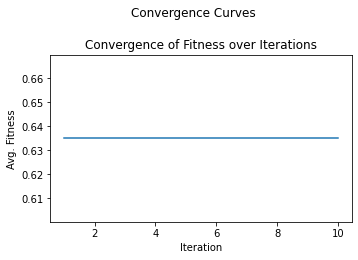

=> Features Selected: 103
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.83871  │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.83871  │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.935484 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.806452 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.677419 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.612903 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.774194 │
╘══════════════════════════════╧══════════╛
CPU times: user 26.5 s, sys: 11 s, total: 37.5 s
Wall time: 5.8 s


In [10]:
%%time
from Py_FS.wrapper.nature_inspired import HS

sol = HS(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Harmony Search', dump_name=f'joblibs/{dataset.name}.joblib')

### Final Result

In [11]:
from tabulate import tabulate

print(tabulate(
    results,
    tablefmt='fancy_grid',
    headers=[
        'Feature Selection',
        'SVM',
        'Decision Tree',
        'Extra Trees',
        'Linear DA',
        'kNN',
        'GaussianNB',
        'MLP',
        'Random Forest'
    ]
))

╒═════════════════════════════╤══════════╤═════════════════╤═══════════════╤═════════════╤══════════╤══════════════╤══════════╤═════════════════╕
│ Feature Selection           │      SVM │   Decision Tree │   Extra Trees │   Linear DA │      kNN │   GaussianNB │      MLP │   Random Forest │
╞═════════════════════════════╪══════════╪═════════════════╪═══════════════╪═════════════╪══════════╪══════════════╪══════════╪═════════════════╡
│ None                        │ 0.806452 │        0.709677 │      0.806452 │    0.774194 │ 0.806452 │     0.709677 │ 0.806452 │        0.806452 │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼──────────┼─────────────────┤
│ mRMR                        │ 0.709677 │        0.806452 │      0.83871  │    0.774194 │ 0.774194 │     0.870968 │ 0.483871 │        0.806452 │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼────────